<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное

**Ответ:** <br>
**1. Нормальное: RM**<br>
**2. Бернулли: CHAS**<br>
**3. Геометрическое: ZN**<br>
**4. Логнормальное: DIS**

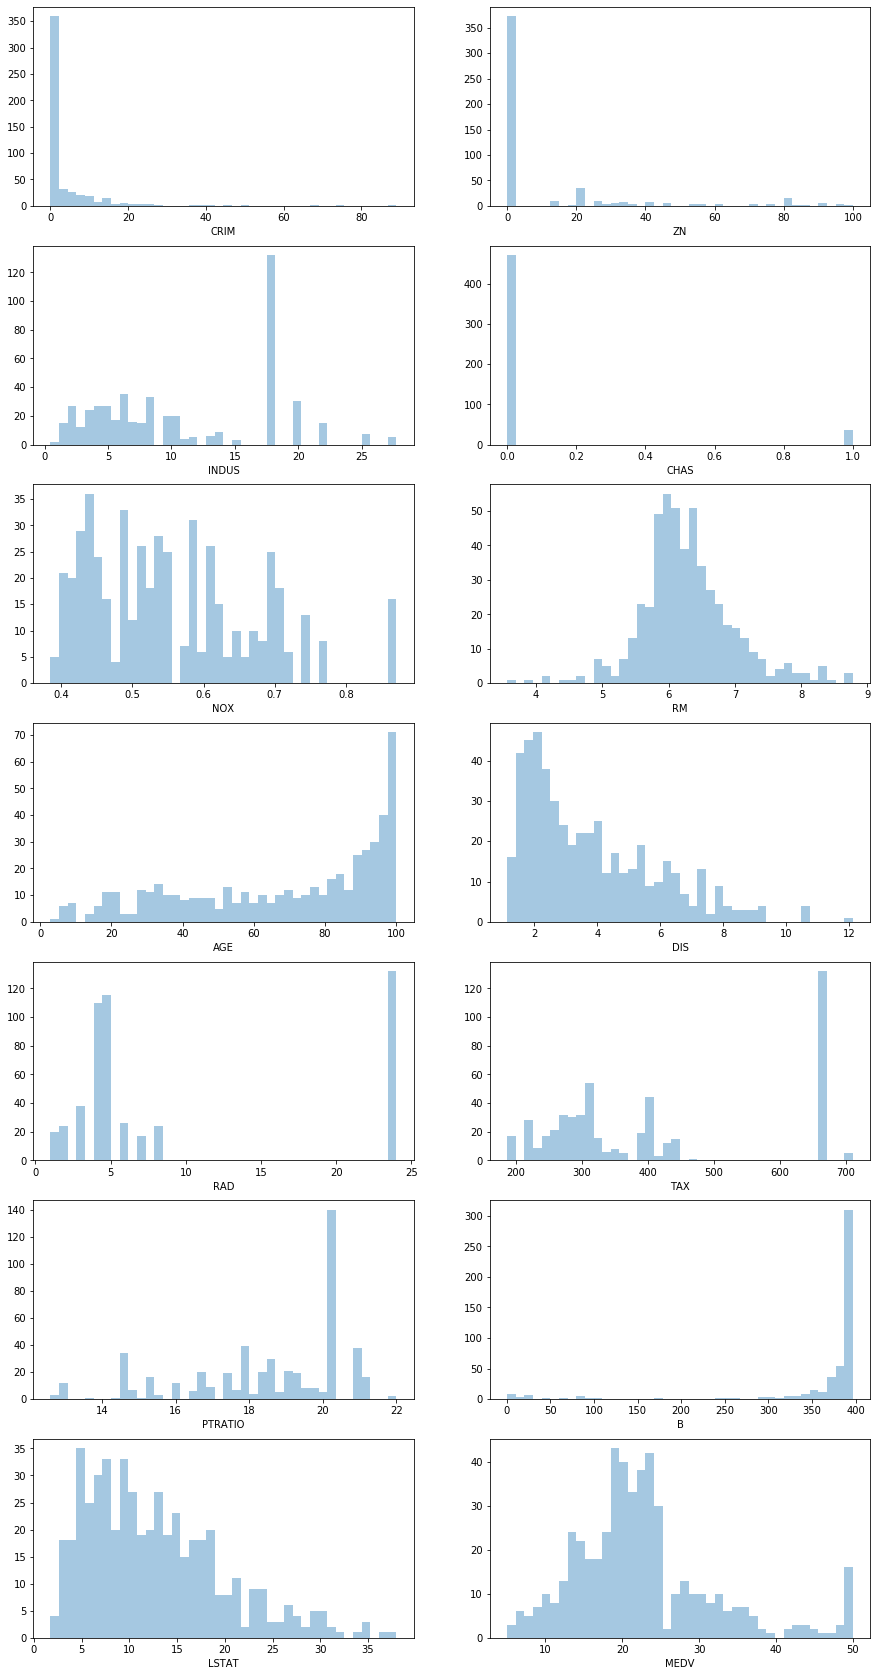

In [3]:
f, axes = plt.subplots(7, 2, figsize=(15, 30))

plt.rcParams["axes.labelsize"] = 10
bins_value = 40
i_counter = 0

for i in data.columns:
    g = sns.distplot(data[i], ax=axes[i_counter // 2, i_counter % 2], kde = False, bins = bins_value)
    i_counter += 1

plt.show()

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [5]:
#Получаем данные по MEDV и LSTAT
medv = data['MEDV']
lstat = data['LSTAT']
#Решейпим к одному столбцу (необходимо для метода fit)
medv = np.array(medv).reshape(-1,1)
lstat = np.array(lstat).reshape(-1,1)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    lstat,
    medv,
    test_size = 0.2,
    # Чтобы у нескольких пользователей был одинаковый рандом
    random_state = 100
)

In [7]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Коэффициент при x и свободный член линейной функции
model.coef_, model.intercept_

(array([[-0.913293]]), array([34.12654201]))

In [9]:
# Ошибка модели (процент точности на тестовых данных)
model.score(X_test, Y_test)

0.5453164888101072

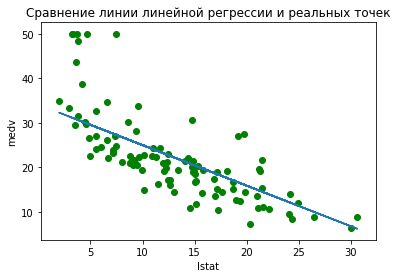

In [10]:
# Построим предсказания
predicted_y = model.predict(X_test)
plt.xlabel('lstat')
plt.ylabel('medv')
plt.title('Сравнение линии линейной регрессии и реальных точек')
plt.plot(X_test, predicted_y)
plt.scatter(X_test, Y_test, color = 'g')
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [11]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)

In [12]:
print('Матрица ковариаций: ')
pd.DataFrame(data).cov()

# Через Numpy нужно обрабатывать Nan
#X = data.iloc[:,1:]
#np.round(np.cov(X, rowvar = False))

Матрица ковариаций: 


,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,2041.000000,1100.838710,995.928571,1061.207792,1657.428571,1108.090909,370.874150,1008.948052,1615.000000,1613.369128
SD of Ladder,1100.838710,2041.000000,173.694805,1259.805195,1219.519481,512.363636,506.897959,797.779221,1254.526490,1208.026846
Positive affect,995.928571,173.694805,2015.000000,785.240260,778.331169,1373.766234,405.292517,715.077922,586.120000,647.908897
Negative affect,1061.207792,1259.805195,785.240260,2015.000000,1253.103896,866.935065,309.231293,681.525974,1050.926667,944.803192
Social support,1657.428571,1219.519481,778.331169,1253.103896,2015.000000,904.538961,230.741497,891.500000,1509.293333,1471.919100
Freedom,1108.090909,512.363636,1373.766234,866.935065,904.538961,2015.000000,736.268707,987.331169,800.926667,821.386087
Corruption,370.874150,506.897959,405.292517,309.231293,230.741497,736.268707,1837.666667,511.333333,368.289773,233.044951
Generosity,1008.948052,797.779221,715.077922,681.525974,891.500000,987.331169,511.333333,2015.000000,949.020000,836.343869
Log of GDP\nper capita,1615.000000,1254.526490,586.120000,1050.926667,1509.293333,800.926667,368.289773,949.020000,1938.000000,1614.025970
Healthy life\nexpectancy,1613.369128,1208.026846,647.908897,944.803192,1471.919100,821.386087,233.044951,836.343869,1614.025970,1887.500000


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [13]:
import math

empty_countries = data[data['Country (region)'].str.len() == 0]
filled_countries = data[data['Country (region)'].str.len() > 0]

print('Количество строк без указания страны: ', len(empty_countries))
print('Количество стран таблице: ', len(filled_countries))

data = data.drop(data[data['Country (region)'].str.len() == 0].index)

empty_lines = 0
for i in data.iloc[:,1:].columns:    
    for j in data[i]:
        if math.isnan(j):
            empty_lines += 1
    data = data[data[i].isna() != True]

print('Количество убранных битых значений (отсутствующие значения):', empty_lines)

Количество строк без указания страны:  0
Количество стран таблице:  156
Количество убранных битых значений (отсутствующие значения): 16


Сколько стран в выборке? Написать ответ. 

In [14]:
print('Итоговый размер рассматриваемой выборки стран:', len(data))

Итоговый размер рассматриваемой выборки стран: 140


Добавить новую колонку в таблицу - 'continent'. Каждая страна относится к определенному материку. Всего материко 6:
*   Евразия,
*   Африка,
*   Северная Америка,
*   Южная Америка,
*   Австралия,
*   Антарктида.

Таким образом, мы можем классифицировать каждый элемент как член определенного класса - континента. 

In [15]:
def set_continent(row):
    # страны - исключения
    if 'Bosnia' in row:
        return 'EU'
    if 'Congo' in row:
        return 'AF'
    country_code = pc.country_name_to_country_alpha2(row, cn_name_format="default")
    continent_name = pc.country_alpha2_to_continent_code(country_code)
    return continent_name

In [16]:
# нашел удобную библиотеку
import pycountry_convert as pc

data['Continent'] = data['Country (region)'].apply(set_continent)

Нарисовать sns.pairplot для класса - континет. Из графика сделать вывод о том, какие континеты похожи.

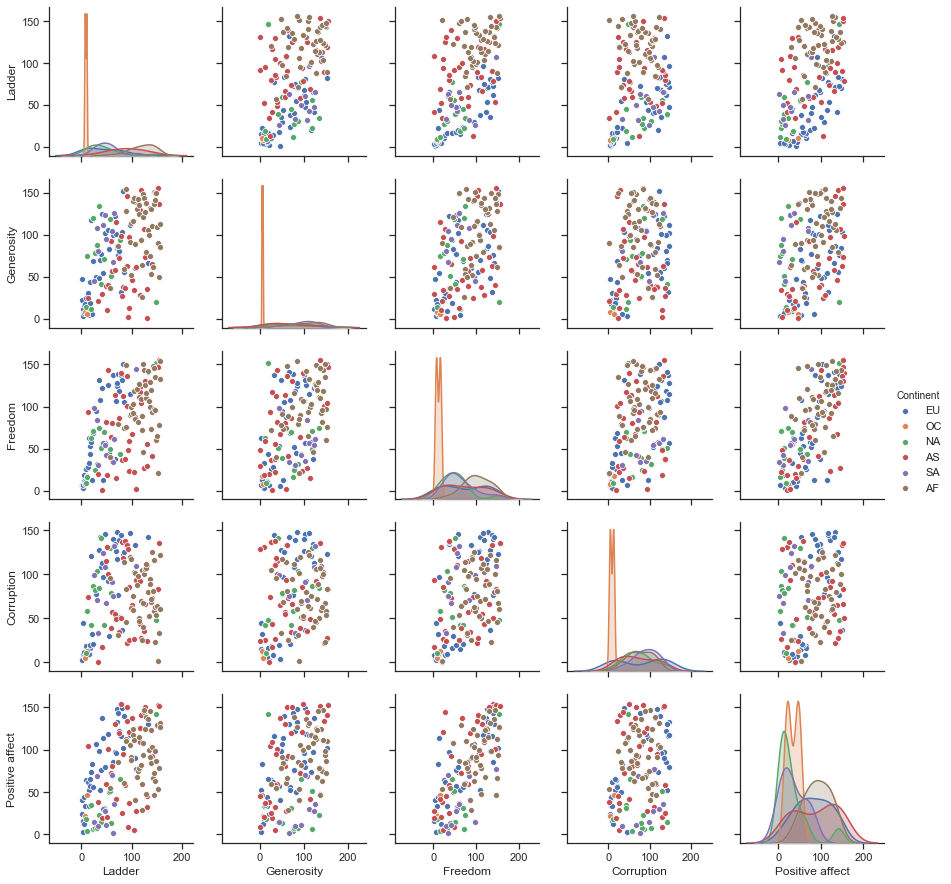

In [17]:
# пример кода на точечный график по континентам

sns.set( style="ticks", color_codes=True)

#Убрал некоторые показатели, т.к. иначе график слишком мелкий
fig = sns.pairplot(data=data[['Ladder','Generosity', 'Freedom', 'Corruption', 'Positive affect','Continent']], hue='Continent')
plt.show()

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [18]:
pd.DataFrame(data).corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.000000,0.555987,0.511870,0.539677,0.833412,0.546414,0.224394,0.485704,0.820608,0.826677
SD of Ladder,0.555987,1.000000,0.090332,0.632734,0.600087,0.250246,0.253344,0.386337,0.663977,0.637554
Positive affect,0.511870,0.090332,1.000000,0.351906,0.433333,0.696567,0.225905,0.417061,0.310843,0.339032
Negative affect,0.539677,0.632734,0.351906,1.000000,0.671387,0.415935,0.166472,0.350541,0.565756,0.507148
Social support,0.833412,0.600087,0.433333,0.671387,1.000000,0.478613,0.148890,0.448135,0.801898,0.755292
Freedom,0.546414,0.250246,0.696567,0.415935,0.478613,1.000000,0.407571,0.498226,0.385919,0.423949
Corruption,0.224394,0.253344,0.225905,0.166472,0.148890,0.407571,1.000000,0.281146,0.186140,0.148973
Generosity,0.485704,0.386337,0.417061,0.350541,0.448135,0.498226,0.281146,1.000000,0.459762,0.453135
Log of GDP\nper capita,0.820608,0.663977,0.310843,0.565756,0.801898,0.385919,0.186140,0.459762,1.000000,0.873628
Healthy life\nexpectancy,0.826677,0.637554,0.339032,0.507148,0.755292,0.423949,0.148973,0.453135,0.873628,1.000000


**Выводы**
1. Все имеющиеся зависимости прямопропорциональны
2. Коррупция несильно коррелирует с остальными показателями
3. ВВП на душу населения связано с продолжительностью жизни

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? Сделать график регрессионной прямой на данных и собственных векторов. 

Собственное значение:  3038.36 Собственный вектор:  [0.72258657 0.69128044]
Собственное значение:  1050.77 Собственный вектор:  [-0.69128044  0.72258657]


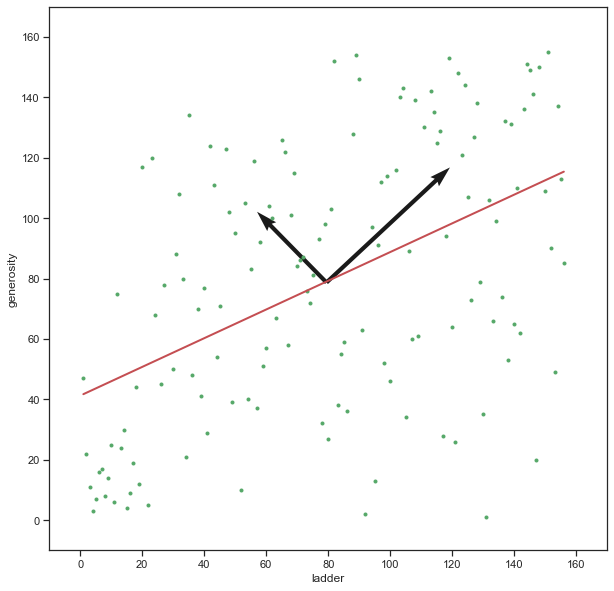

In [19]:
import numpy.linalg as la

ladder = data['Ladder']
generosity = data['Generosity']

# np.stack - матрица (np.ndarray - n-dimensional array) из 2 строк (length и width)
# и n столбцов
# Y - матрица из 2 столбцов и n строк

Y = np.vstack((ladder, generosity))

# w - собственные значения 
# v - собсвтенные вектора
w,v = la.eig(np.cov(Y))


plt.figure(figsize=(10,10))
plt.plot(ladder, generosity, 'g.')

# для каждого собственного значения
for i in range(len(w)):
    # plt.gcf()  - Get current figure. Текущая фигура (если ее нет, то автоматически создается)
    fig = plt.gcf()
    # вектора опряделяются по столбцам v, а не по строкам (https://stackoverflow.com/questions/55596741/finding-eigen-vectors-using-numpy-linalg-eig)
    print('Собственное значение: ', round(w[i],2), 'Собственный вектор: ', v[:,i])
    plt.xlabel('ladder')
    plt.ylabel('generosity')
    
    # отображение
    plt.quiver(ladder.mean(),
               generosity.mean(),
               # https://en.wikipedia.org/wiki/Covariance_matrix
               # https://towardsdatascience.com/pca-eigenvectors-and-eigenvalues-1f968bc6777a
               math.sqrt(w[i]) * v[0][i],
               math.sqrt(w[i]) * v[1][i],
               angles = 'xy', scale_units = 'xy', scale = 1)
    plt.xlim(-10, 170)
    plt.ylim(-10, 170)
    
# линейная регрессия
# 1 - степень полинома
reg_coefs = np.polyfit(ladder,generosity,1)

plt.plot(ladder, reg_coefs[0] * ladder + reg_coefs[1], color='r', linewidth=2) 
    
plt.show()



# Дискретное распределение случайной величины


Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

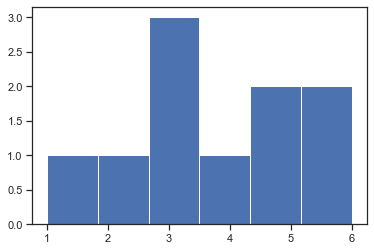

In [20]:
# Количество бросков
number_of_casts = 10

# Возвращает одно из 6 значений с равной вероятностью (дискретное равновномерное распределение)
values = np.random.randint(1, 7, number_of_casts)
plt.hist(values, bins = 6)
plt.show()

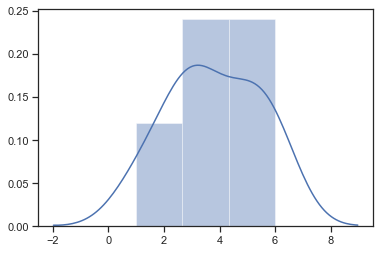

In [21]:
sns.distplot(values)
plt.show()

моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

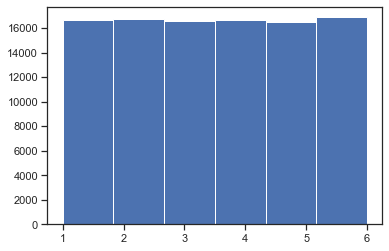

In [22]:
# При увеличении количества бросков
number_of_casts = 100

# Кол-во эксперементов
number_of_experiments = 1000

list_values = []
outcomes = np.empty(number_of_experiments, dtype=np.int)

for i in range(number_of_experiments):
    values = np.random.randint(1, 7, number_of_casts)
    outcomes[i] = np.sum(values)
    for value in values:
        list_values.append(value)

# Дискретное равновномерное распределение
plt.hist(list_values, bins = 6)

plt.show()

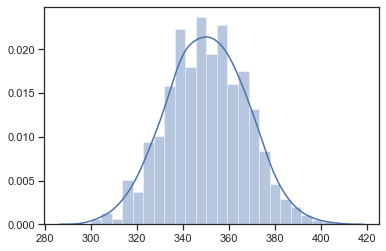

In [23]:
sns.distplot(outcomes)
plt.show()

**Ответ**<br>
Центральную предельную теоремы можно применить, т.к. независимое событие определения суммы значений граней кубика проводится много раз. <br>
График изменился т.к. распределение случайной величины (сумма значений на гранях кубика при 100 бросках) при большом кол-ве экспериментов стремится к нормальному